### Theory
We will start with some theory before we jump into solving the problems using python. Multivariate optimization is probably one of the most important bedrocks of machine learning. Most of the functions we see in real-life are actually multivariate meaning that they have more than one input variable. 
<br>For single variable functions like: Speed of an object with constant acceleration is given by $v_t$ = $v_0 + \frac{1}{2}\times a\times t^2$
<br>Where $v_0$ is the initial velocity $v_t$ is the velocity at time t and a is the acceleration. In-fact this is one of the outcome of Newton's Laws of Motion (also the man who is responsible for calculus). We will not dive into the depth of univariate optimization because principles applicable to multivariate are derived from univariate analysis.
<br>However, we will use one of the main results which is the Taylor's theorem. Which says any continuous - differentiable function can be expressed as a series which is:
          ***<br><center>$f(x) = f(a) + \frac{f'(a)}{1!} \times (x-a) + \frac{f''(a)}{2!} \times (x-a)^2 + \frac{f'''(a)}{3!} \times (x-a)^3 ... \infty$ </center>***
    <br>This is the most important result we will be using continuously for our analysis. Let us start extending this to the multivariate case straight away. For multivariate analysis we try to arrive at a quadratic approximation of a function, we will come to that soon.  
    
#### Quadratic Approximation
Using Taylor's series any function can be approximated as a quadratic function which is simply taking first 3 terms of the function. 
1. $f(x_0) is the value of function at point x_0$
2. $\frac{f'(x_0)}{1!} \times (x-x_0)$ is the first derivative at point $x_0$ times $(x-x_0)$
3. $\frac{f''(a)}{2!} \times (x-a)^2$ is the second derivative at $x_0$ times $(x-x_0)^2$

<br>Essentially if $Q_x(x_0)$ is the quadratic approximation of function f(x) at $x_0$ then $Q_x(x_0)$ can be written as:
<br><center>$Q_x(x_0) = f(x_0) + \frac{f'(x_0)}{1!} \times (x-x_0) + \frac{f''(x_0)}{2!} \times (x-x_0)^2$ </center>
<br>You may ask why quadratic approximation why not cubic or higher order there are two reasons for the same:
1. Quadratic functions form parabolas (in 2D) and parabolids (in higher dimensions) and they have unique maxima and minimas
2. After $2^{nd}$ degree most of the functions become so low for the difference between (X and $X_0$) that we can ignore them
<br>***NOTE*** We are trying to map the behavior of a function in close vicinity to identify maxima and minima therefore point 2 become relevant this doesn't mean that all functions have very low 3rd degree term for all values. However, for this specific purpose where we are trying to map the behavior of function in very close vicinity this becomes a helpful tool. We will come to this in a bit. 

#### Why looking at the function in vicinity
Look at the graph below, this is plot of sin(x) + cos(x) in the given range there are 4 valleys and 4 tops, and there is are two criss-cross valleys along maximum and minimum. 
<br>Now as you would have observed any graph, when magnified to a large extent will turn into a flat graph. Now when the graph turns flat a small movement in any direction can be easily approximated by a quadratic function. 
<br>Why not a linear function? 
<br>Well, then you cannot find a maxima you have to simplify the assumption only to the level that it serves the purpose. Another reason for using quadratic as I told was it forms a parabolid which has a definite maxima/ minima. Let us see curve of $x^2 + y^2$ v/s $x^3 + y^3$ to see definite maxima/ minima. 

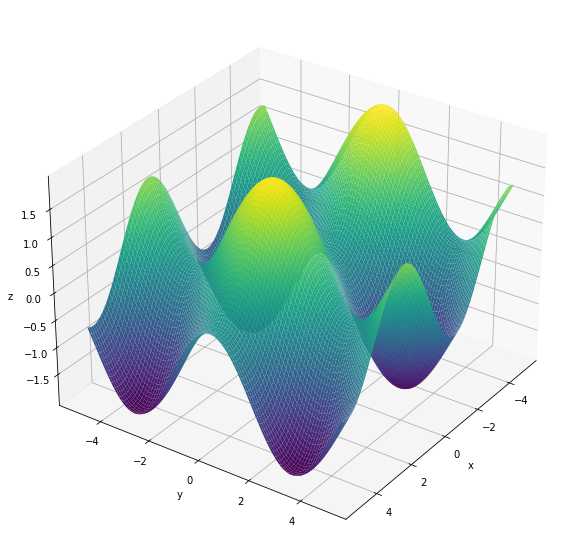

In [41]:
import matplotlib.pyplot as plt
import numpy as np
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,35)

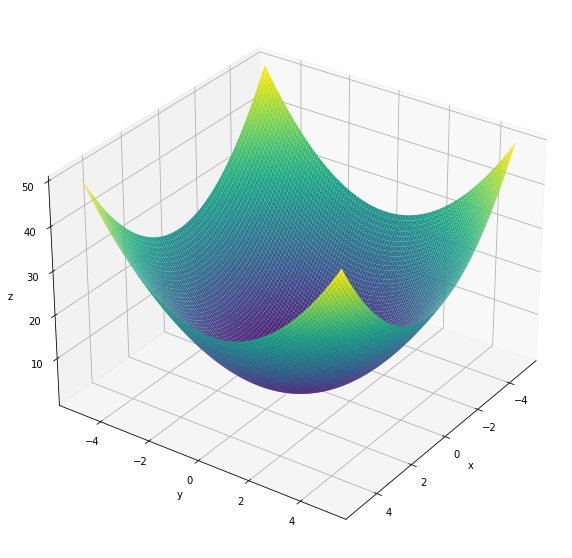

In [42]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
def f(x, y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,35)

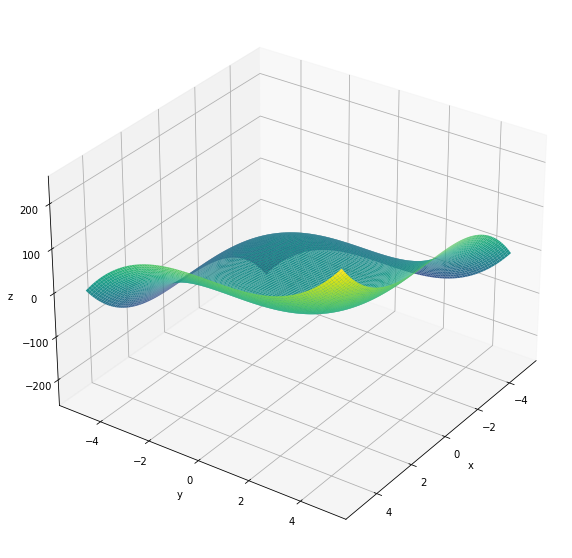

In [43]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
def f(x, y):
    return x**3 + y**3

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,35)

**Quadratic functions are more tractable than cubic functions**
<br>As we can see above finding a maxima for a quadratic functions is a lot more easier than for a cubic function so once we have found out a critical region (where the derivative of the function becomes 0) we can use quadratic approximation to classify the point as point of minima/ maxima. 
<br>There is a more formal proof of this using the Taylor's series, but I thought a visual intuition will be a better way to understand. 

Now that we have established quadratic approximation can be used for identification of maxima and minima points. Let us extend our argument for more than one variables to create a step-by-step process to identify the possible solutions, we will try to solve all of this using python.
##### Extending Quadratic Approximation to 2 functions of two-variables:
Let us start our simplest case of multi-variate function using function of two variables given by f(x,y) = z. Quadratic approximation of the same is given by:
<br><center> $Q(x,y) = f(x_0,y_0) + f_x(x_0,y_0) \times (x - x_0) + f_y(x_0,y_0) \times (y-y_0) + \frac{1}{2}[f_{xx}(x_0,y_0) \times (x-x_0)^2 + f_{yy}(x_0,y_0) \times (y-y_0)^2 + f_{xy}(x_0,y_0) \times (x-x_0)(y-y_0) + f_{yx}(x_0,y_0) \times (x-x_0)(y-y_0)]$ </center>
<br>**WOAH!!!** That is some big-a** function, let us break that down into it's component to understand what each of the elements of the function mean and how do we extend our argument of minimization from single-variable functions to a function of two variables and then subsequently generalize it.
<br>As we can see there are 3 distinct component of the function $Q(x,y)$ above we are evaluating it at x,y in vicinity of $x_0$ and $y_0$:
1. $f(x_0,y_0)$ is basically the value of the function at points $x_0$ and $y_0$
2. $f_x(x_0,y_0)(x-x_0) + f_y(x_0,y_0)(y-y_0)$ is the first order derivative evaluated at $x_0 and y_0$ multiplied by respective x and y values
3. $\frac{1}{2}[f_{xx}(x_0,y_0) \times (x-x_0)^2 + f_{yy}(x_0,y_0) \times (y-y_0)^2 + f_{xy}(x_0,y_0) \times (x-x_0)(y-y_0) + f_{yx}(x_0,y_0) \times (x-x_0)(y-y_0)]$ which simplifies to $\frac{1}{2}[f_{xx}(x_0,y_0) \times (x-x_0)^2 + f_{yy}(x_0,y_0) \times (y-y_0)^2 + 2f_{xy}(x_0,y_0) \times (x-x_0)(y-y_0)]$ because for continuous functions $f_{xy} = f_{yx}$ which is the second order derivative term
<br>Let us sort out a couple of definitions first:
**TANGENT PLANE**:
<br>Equation of a tangent plant at $x_0$ and $y_0$ is given by $f(x_0,y_0) + f_x(x_0,y_0)\times (x-x_0) + f_y(x_0,y_0) \times (y-y_0)$. Let us try to understand this equation is single degree because of multiplication by $(x-x_0)$ and $(y-y_0)$ $f_x(x_0,y_0)$ and $f_y(x_0,y_0)$ is the slope of the curve at $(x_0,y_0)$ and this also passes through $f(x_0,y_0)$. So we can define any tangent plane by the following equation:
<br><center> $T_x(x_0,y_0) = f(x_0,y_0) + f_x(x_0,y_0)\times (x-x_0) + f_y(x_0,y_0) \times (y-y_0)$ </center>
<br>Now remember at critical point (where $f_x(x,y) = f_y(x,y) = 0$ will have horizontal tangent planes which is also the definition of maxima/ minima condition. 
<br>Let us try to understand it via two examples 

*QUESTION 1*
<br> f(x,y) = $2x^2 + y^2$ find the equation of tangent plant at point (1,2)
<br> Also find critical point and find the equation of tangent plane there. 
*SOLUTION 1*:
<br>Here the value of $f_x(x,y) = 4x$ and $f_y(x,y) = 2y$ $\to$ slope of tangent point is given by 4x1 = 4 and 2x2 = 4 from above equation can be given by $T_x(x_0,y_0) = f(x_0,y_0) + f_x(x_0,y_0)\times (x-x_0) + f_y(x_0,y_0) \times (y-y_0)$
<br>which is $T_x(1,2) = f(1,2) + 4(x-1) + 4(y-2)$; 
<br>f(1,2) = $2 \times 1^2 + 2^2 = 6$ putting in the equation the equation above becomes
<br>$T_x(1,2) = 6 + 4x - 4 + 4y - 8 \to T_x(1,2) = 4x+4y-6$
<br>Which you can see from plot 1 below it is touching the paraboloid at point (1,2) you can try and rotate the graph to see it

<br>For the equation of tangent plane at critical point we need to find the critical point which can be computed by equating both $f_x(x,y) and f_y(x,y)$ to Zero and finding value for x,y.
<br>$f_x(x,y) = 4x$ and $f_y(x,y) = 2x$ equating them to Zero we get x=0 and y=0. So our critical point is at (0,0) Origin
<br>Now slope of tangent plane at critical point is 0 (Which is by definition and also by the above equation where we equated $f_x(x,y)$ and $f_y(x,y)$ to Zero. 
<br>So equation to tangent plane beccomes $T_x(x_0,y_0) = 0$ which essentially means Z = 0 
<br>Let us plot the same in second graph.

In [64]:
#PLOT 1
import sympy as sp
x,y = sp.symbols('x y')
paraboloid = sp.lambdify((x,y),2*x**2 + y**2)
plane = sp.lambdify((x,y),4*x+4*y-6)
plane2 = sp.lambdify(x,y),x+y)
import numpy as np
points = np.linspace(-5,5,90)
x,y = np.meshgrid(points,points)

import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = paraboloid(x,y)),go.Surface(z = plane(x,y))])
fig.show()

In [70]:
#PLOT 2
import sympy as sp
x,y = sp.symbols('x y')
paraboloid = sp.lambdify((x,y),2*x**2 + y**2)
#plane = sp.lambdify((x,y),4*x+4*y-6)
plane2 = sp.lambdify((x,y),x+y)
import numpy as np
points = np.linspace(-5,5,90)
x,y = np.meshgrid(points,points)

import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = paraboloid(x,y)),go.Surface(z = 0*plane2(x,y))]) #Any equation multiplied by 0 is z= 0
fig.show()

One more interesting property of the tangent plane is when it is horizontal there may be 3 situations:
1. The point is maxima
2. Point is minima
3. Point is a saddle point
<br>Let us try to understand how do we know which one is which, for the same we will have to go to the third element of our equation:
<br><center>$\frac{1}{2}[f_{xx}(x_0,y_0) \times (x-x_0)^2 + f_{yy}(x_0,y_0) \times (y-y_0)^2 + 2f_{xy}(x_0,y_0) \times (x-x_0)(y-y_0)]$ </center>
<br>Which when converted to vector form becomes:
<br> <center>$\frac{1}{2}(x-x_0)^T \times H_f(x_0,y_0) \times (x-x_0)$</center>
<br>Here $H_f$ is the Hessian Matrix which is evaluated at point $x_0,y_0$ which is nothing but a matrix comprising of double derivatives evaluated at point $x_0$ and $y_0$. 
<br> If we go back to our quadratic approximation expression it becomes in vector form:
<br><center> Q(x,y) =  $f(x_0)$ + $\Delta f(x_0)(x-x_0) + \frac{1}{2}(x-x_0)^T \times H_f(x_0,y_0) \times (x-x_0)$</center>
<br>*NOTE* Here $x_0$ is not the x variable but a vector comprising of $[x_0, y_0]$
<br>Now, as a condition for minima/ maxima we have established that $2^{nd}$ term i.e. $\Delta f(x_0)(x-x_0)$ is Zero so now if we rearrange the above equation we get:
<br> <center>Q(x,y) - $f(x_0,y_0)$ = $\frac{1}{2}(x-x_0)^T \times H_f(x_0,y_0) \times (x-x_0)$</center>
<br>If term on RHS $\gt$ 0 means a small movement in x or y around $x_0$ or $y_0$ is going to increase the value of function $\to$ $f(x_0,y_0)$ is the minima and if RHS $\lt$ 0 means vice-versa and the function is going to decrease means that is the maxima. (**Argument here is if a function has reached a minima any movement around it is going to increase the value and vice-versa**). 

<br>What if the second derivative is also Zero then we move to the third derivative in that case. This is where properties of $H_x(x_0,y_0)$ comes really handy. We will not be proving them, they are pretty intuitive with the discussion we have had:
1. If Determinant of $H_x(x_0,y_0)$ is $\gt$ 0 then there are solutions to maxima and minima problem:
    a. If all the eigen values of the matrix are positive $\to$ minima
    b. If all the eigen values of the matrix are negative then the critical point $(x_0,y_0)$ is a maxima
2. If the Determinant of $H_x(x_0,y_0)$ is $\lt$ 0 $\to$ the value is a saddle point
3. If Determinant of $H_x(x_0,y_0)$ is $=$ 0 $\to$ we need to investigate further (go to higher order derivatives)

##### Summarizing 
In order to compute the maxima/minima or to identify them we follow following steps:
1. **COMPUTE CRITICAL POINT** This is done via equating first derivative = 0 i.e $f_x(x,y) = 0$ and $f_y(x,y) = 0$ solve for x,y all pairs of (x,y) will be the critical points. 
2. Compute H_x(x,y) for all pairs of (x,y) which is nothing but $\begin{bmatrix} f_{xx}(x,y) & f_{xy}(x,y) \\ f_{xy}(x,y) & f_{yy}(x,y)\end{bmatrix}$
    a. If the determinant value is > 0 means there is either a maxima/ minima depending on the eigen values (Negative - Maxima; Positive - Minima)
   <br> b. If the determinant value is < 0 means this is a saddle point
    <br>c. If determinant value is Zero then we need further investigation 

#### Problems and Solutions
**QUESTION 1**:
<br>Let us try to solve this following equation:
<br> f(x,y) = $x^4 -4x^2 + y^2$
<br>Let us first plot the function (just for fun we don't need to plot every function to do the analysis)


In [75]:
import sympy as sp
x,y = sp.symbols('x y')
function = sp.lambdify((x,y),x**4 - 4*x**2 + y**2)
import numpy as np
points = np.linspace(-3,3,100)
x,y = np.meshgrid(points,points)
import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = function(x,y))])
fig.show()

Looks like a bed of a river with a bit of elevation at the center. Now let us try to differentiate the function using ```sympy```

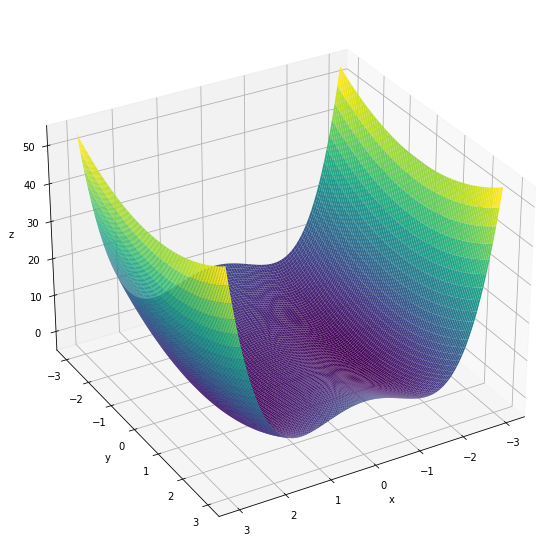

In [121]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
def f(x, y):
    return x**4 - 4*x**2 + y**2

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,60)

In [79]:
x,y = sp.symbols('x y')
function = x**4 - 4*x**2 + y**2
function
sp.solve(sp.Eq(sp.diff(function,x),0))

[0, -sqrt(2), sqrt(2)]

In [80]:
##Similarly solving for y
sp.solve(sp.Eq(sp.diff(function,y),0))

[0]

In [82]:
sp.diff(function,y)

2*y

In [116]:
sp.diff(function,x,2)

4*(3*x**2 - 2)

This means our solution set is:
1. (0,0)
2. (-$\sqrt{2}$,0)
3. ($\sqrt{2}$,0)

<br>Now let us compute the Hessian Matrix for each of these points for which we need to compute following 3 quantities:
1. $f_{xx}(x_0,y_0)$ where $x_0$ and $y_0$ are each of the above points
2. $f_{xy}(x_0,y_0)$ where $x_0$ and $y_0$ are each of the above points
3. $f_{yy}(x_0,y_0)$ where $x_0$ and $y_0$ are each of the above points
<br>Each of these quantities can be computed easily using our ```sympy``` package

In [83]:
sp.diff(function,y,2)
#This is independent of x_0 and y_0 so will be constant

2

In [100]:
case_1 = sp.diff(function,x,2).subs([(x,np.sqrt(2))])
case_2 = sp.diff(function,x,2).subs([(x,-np.sqrt(2))])
case_3 = sp.diff(function,x,2).subs([(x,0)])
print(f"Case_1:{case_1}, Case_2:{case_2}, Case_3:{case_3}")
#We will create 2 Hessian Matrix because case1 and case 2 are same

Case_1:16.0000000000000, Case_2:16.0000000000000, Case_3:-8


In [87]:
sp.diff(function,x,y)
#The value of f_xy and f_yx = 0

0

Means our hessian matrix will look like
<br>$\begin{bmatrix} f_{xx}(x,y) & 0 \\ 0 & 2\end{bmatrix}$
<br>Where $f_{xx}(x,y)$ will take values as per case_1, case_2 or case_3

In [112]:
mat_1 = np.array([[case_1,0.0],[0.0,2.0]],dtype = 'float')
mat_2 = np.array([[case_3,0],[0,2]],dtype='float')

In [113]:
np.linalg.eig(mat_1)

(array([16.,  2.]),
 array([[1., 0.],
        [0., 1.]]))

We have 2 eigen values 16 and 2 both of which are positive means we can conclude this is the local minima at $\sqrt{2}$ and -$\sqrt{2}$

Now let us compute for case 3 where our x value is 0 therefore the Hessian Matrix is:
<br>$\begin{bmatrix} 0 & 0 \\ 0 & 2\end{bmatrix}$

In [114]:
np.linalg.eig(mat_2)

(array([-8.,  2.]),
 array([[1., 0.],
        [0., 1.]]))

Means we have Minima at (+/-$\sqrt{2},0)$ and saddle point at (0,0)

This you can observe in the graph as well while there are definite decrease at ($\sqrt{2}$,0) and (-$\sqrt{2}$,0), at (0,0) we can see that the points increases and then decreases. 